# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     50.78
Date:                Tue, 25 Mar 2025   Prob (F-statistic):           6.65e-31
Time:                        08:41:13   Log-Likelihood:                -349.90
No. Observations:                 244   AIC:                             709.8
Df Residuals:                     239   BIC:                             727.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.7961      0.224      3.

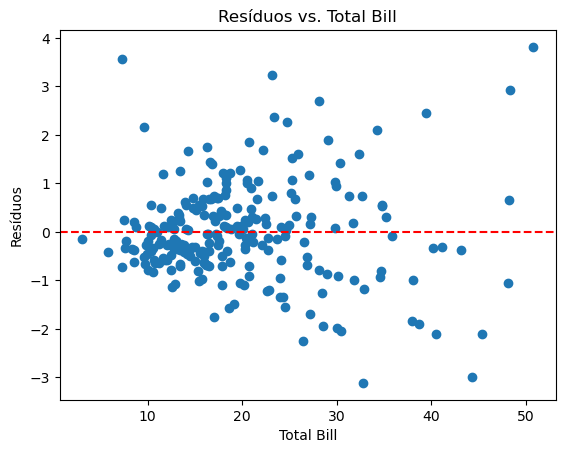

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     90.56
Date:                Tue, 25 Mar 2025   Prob (F-statistic):           4.65e-30
Time:                        08:41:13   Log-Likelihood:                -356.57
No. Observations:                 244   AIC:                             719.1
Df Residuals:                     241   BIC:                             729.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -3.0317      0.462     -6.

In [12]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import patsy
import matplotlib.pyplot as plt
import seaborn as sns

df_tips = sns.load_dataset("tips")

y, X = patsy.dmatrices("tip ~ sex + smoker + time + total_bill", data=df_tips, return_type="dataframe")
modelo_tip = smf.ols("tip ~ sex + smoker + time + total_bill", data=df_tips).fit()

print(modelo_tip.summary())
modelo_tip_adj = smf.ols("tip ~ smoker + total_bill", data=df_tips).fit()
print(modelo_tip_adj.summary())

residuos = modelo_tip_adj.resid
plt.scatter(df_tips["total_bill"], residuos)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Total Bill")
plt.ylabel("Resíduos")
plt.title("Resíduos vs. Total Bill")
plt.show()

df_tips["log_total_bill"] = np.log(df_tips["total_bill"])
df_tips["total_bill_sq"] = df_tips["total_bill"]**2

modelo_log = smf.ols("tip ~ smoker + log_total_bill", data=df_tips).fit()
modelo_poly = smf.ols("tip ~ smoker + total_bill + total_bill_sq", data=df_tips).fit()

print(modelo_log.summary())
print(modelo_poly.summary())


### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

                            OLS Regression Results                            
Dep. Variable:            log_tip_pct   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     10.77
Date:                Tue, 25 Mar 2025   Prob (F-statistic):           4.80e-08
Time:                        08:42:24   Log-Likelihood:                -69.519
No. Observations:                 244   AIC:                             149.0
Df Residuals:                     239   BIC:                             166.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.6103      0.071    -22.

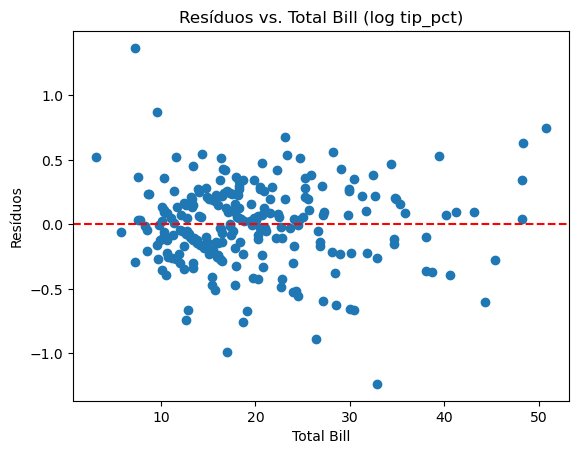

                            OLS Regression Results                            
Dep. Variable:            log_tip_pct   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     24.17
Date:                Tue, 25 Mar 2025   Prob (F-statistic):           2.72e-10
Time:                        08:42:24   Log-Likelihood:                -67.443
No. Observations:                 244   AIC:                             140.9
Df Residuals:                     241   BIC:                             151.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.9724      0.141     -6.

In [17]:
df_tips["tip_pct"] = df_tips["tip"] / df_tips["total_bill"]
df_tips["log_tip_pct"] = np.log(df_tips["tip_pct"])

modelo_pct = smf.ols("log_tip_pct ~ sex + smoker + time + total_bill", data=df_tips).fit()
print(modelo_pct.summary())

modelo_pct_adj = smf.ols("log_tip_pct ~ smoker + total_bill", data=df_tips).fit()
print(modelo_pct_adj.summary())

plt.scatter(df_tips["total_bill"], modelo_pct_adj.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Total Bill")
plt.ylabel("Resíduos")
plt.title("Resíduos vs. Total Bill (log tip_pct)")
plt.show()

modelo_pct_log = smf.ols("log_tip_pct ~ smoker + log_total_bill", data=df_tips).fit()
modelo_pct_poly = smf.ols("log_tip_pct ~ smoker + total_bill + total_bill_sq", data=df_tips).fit()

print(modelo_pct_log.summary())
print(modelo_pct_poly.summary())

r2_tip = modelo_tip_adj.rsquared
r2_pct = modelo_pct_adj.rsquared
print(f"R² (tip): {r2_tip:.4f}, R² (log tip_pct): {r2_pct:.4f}")

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

Index(['Unnamed: 0', 'data_ref', 'id_cliente', 'sexo', 'posse_de_veiculo',
       'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao',
       'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego',
       'qt_pessoas_residencia', 'renda'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     2162.
Date:                Tue, 25 Mar 2025   Prob (F-statistic):               0.00
Time:                        08:39:28   Log-Likelihood:            -1.2963e+05
No. Observations:               12427   AIC:                         2.593e+05
Df Residuals:                   12425   BIC:                         2.593e+05
Df Model:                           1                                         
Covariance Type:

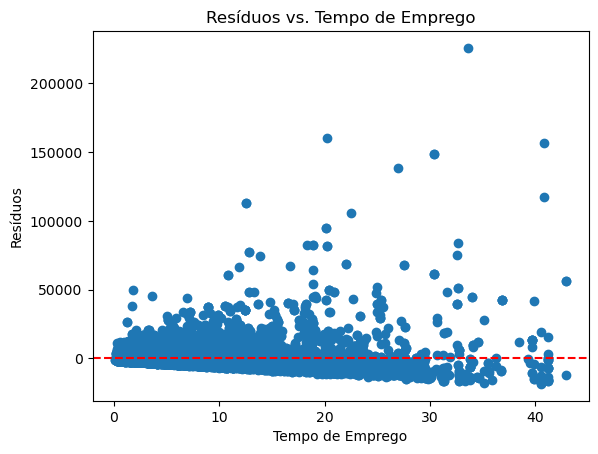

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     865.0
Date:                Tue, 25 Mar 2025   Prob (F-statistic):               0.00
Time:                        08:39:29   Log-Likelihood:                -15137.
No. Observations:               12427   AIC:                         3.028e+04
Df Residuals:                   12423   BIC:                         3.031e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.7690      0.036    217.881

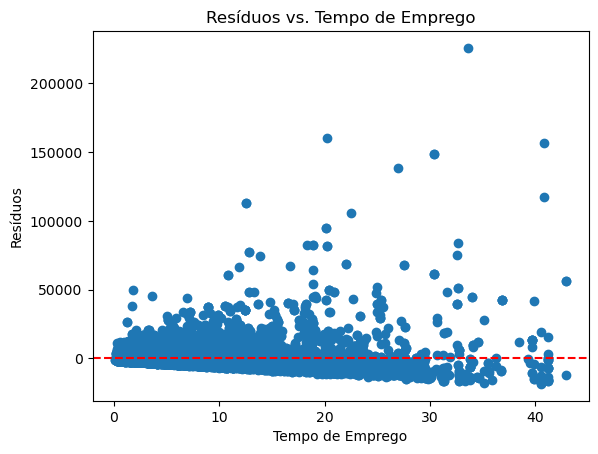

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     2162.
Date:                Tue, 25 Mar 2025   Prob (F-statistic):               0.00
Time:                        08:39:29   Log-Likelihood:            -1.2963e+05
No. Observations:               12427   AIC:                         2.593e+05
Df Residuals:                   12425   BIC:                         2.593e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2177.9041    112.212     19.409

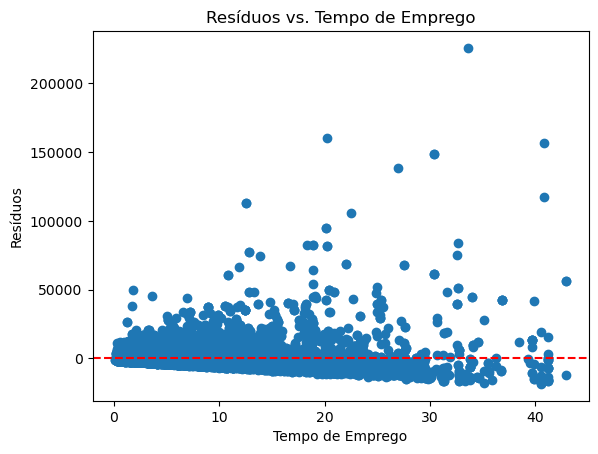

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     865.0
Date:                Tue, 25 Mar 2025   Prob (F-statistic):               0.00
Time:                        08:39:29   Log-Likelihood:                -15137.
No. Observations:               12427   AIC:                         3.028e+04
Df Residuals:                   12423   BIC:                         3.031e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.7690      0.036    217.881

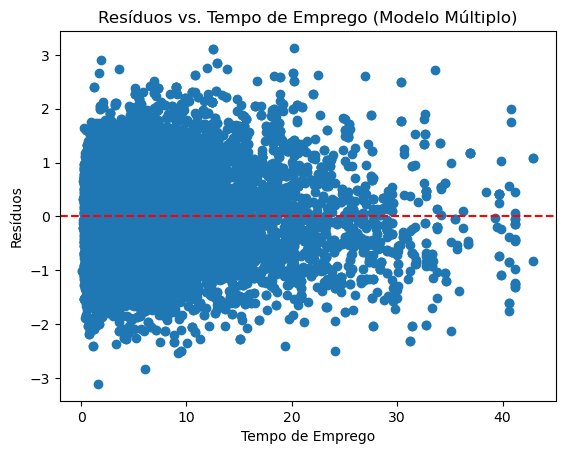

In [9]:
df_renda = pd.read_csv("previsao_de_renda.csv").dropna()
print(df_renda.columns)

df_renda = df_renda.drop(columns=["data_ref", "index"], errors="ignore")
df_renda = pd.get_dummies(df_renda, drop_first=True)

modelo_renda_simples = smf.ols("renda ~ tempo_emprego", data=df_renda).fit()
print(modelo_renda_simples.summary())

plt.scatter(df_renda["tempo_emprego"], modelo_renda_simples.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Tempo de Emprego")
plt.ylabel("Resíduos")
plt.title("Resíduos vs. Tempo de Emprego")
plt.show()

modelo_renda_multipla = smf.ols("np.log(renda) ~ tempo_emprego + idade + qtd_filhos", data=df_renda).fit()
print(modelo_renda_multipla.summary())

plt.scatter(df_renda["tempo_emprego"], modelo_renda_simples.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Tempo de Emprego")
plt.ylabel("Resíduos")
plt.title("Resíduos vs. Tempo de Emprego")
plt.show()
df_renda = pd.read_csv("previsao_de_renda.csv").dropna()

df_renda = df_renda.drop(columns=["data_ref", "index"], errors="ignore")
df_renda = pd.get_dummies(df_renda, drop_first=True)

modelo_renda_simples = smf.ols("renda ~ tempo_emprego", data=df_renda).fit()
print(modelo_renda_simples.summary())

plt.scatter(df_renda["tempo_emprego"], modelo_renda_simples.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Tempo de Emprego")
plt.ylabel("Resíduos")
plt.title("Resíduos vs. Tempo de Emprego")
plt.show()

modelo_renda_multipla = smf.ols("np.log(renda) ~ tempo_emprego + idade + qtd_filhos", data=df_renda).fit()
print(modelo_renda_multipla.summary())

plt.scatter(df_renda["tempo_emprego"], modelo_renda_multipla.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Tempo de Emprego")
plt.ylabel("Resíduos")
plt.title("Resíduos vs. Tempo de Emprego (Modelo Múltiplo)")
plt.show()